## 이미지 처리 딥러닝
# Cifar10 분류

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
import tensorflow as tf
from tensorflow import keras

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [7]:
X_train.dtype, X_train.max(), X_train.min()

(dtype('uint8'), 255, 0)

### 데이터 전처리

In [8]:
X_train = X_train/255
X_test = X_test/255

y_train = np.eye(10)[y_train.ravel()]
y_test = np.eye(10)[y_test.ravel()]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [9]:
labels = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

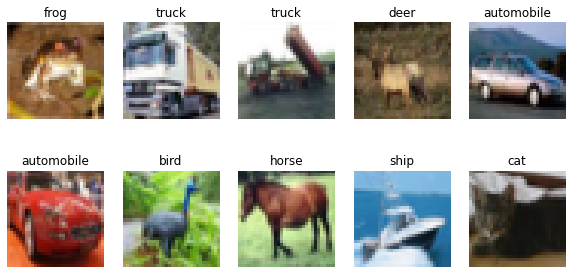

In [10]:
plt.figure(figsize=[10,5])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(labels[y_train[i].argmax()])

### CNN 적용

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same',
            activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [16]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5,
                   validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 100s 309ms/step - loss: 1.8297 - acc: 0.3485 - val_loss: 1.4164 - val_acc: 0.5085
Epoch 2/5
313/313 [==============================] - 89s 283ms/step - loss: 1.3452 - acc: 0.5309 - val_loss: 1.2840 - val_acc: 0.5622
Epoch 3/5
313/313 [==============================] - 86s 275ms/step - loss: 1.2335 - acc: 0.5738 - val_loss: 1.2575 - val_acc: 0.5670
Epoch 4/5
313/313 [==============================] - 84s 270ms/step - loss: 1.1700 - acc: 0.5953 - val_loss: 1.2018 - val_acc: 0.5899
Epoch 5/5
313/313 [==============================] - 84s 267ms/step - loss: 1.1172 - acc: 0.6145 - val_loss: 1.1762 - val_acc: 0.5974


### 중간층 추가

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(32,32,3),
                              activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # 50% 를 누락
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [21]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10,
                   validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 391s 1s/step - loss: 2.0643 - acc: 0.2279 - val_loss: 1.5072 - val_acc: 0.4709
Epoch 2/10
313/313 [==============================] - 375s 1s/step - loss: 1.5361 - acc: 0.4443 - val_loss: 1.2951 - val_acc: 0.5432
Epoch 3/10
313/313 [==============================] - 367s 1s/step - loss: 1.3570 - acc: 0.5110 - val_loss: 1.1618 - val_acc: 0.5839
Epoch 4/10
313/313 [==============================] - 366s 1s/step - loss: 1.2506 - acc: 0.5536 - val_loss: 1.0746 - val_acc: 0.6194
Epoch 5/10
313/313 [==============================] - 367s 1s/step - loss: 1.1744 - acc: 0.5807 - val_loss: 0.9908 - val_acc: 0.6487
Epoch 6/10
313/313 [==============================] - 379s 1s/step - loss: 1.0976 - acc: 0.6102 - val_loss: 0.9159 - val_acc: 0.6813
Epoch 7/10
313/313 [==============================] - 372s 1s/step - loss: 1.0696 - acc: 0.6218 - val_loss: 0.9020 - val_acc: 0.6851
Epoch 8/10
313/313 [==============================] - 373s 1s/step - 

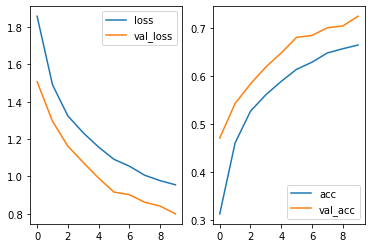

In [22]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [23]:
model.save('cifar10_model_1.h5')  # creates a HDF5 file

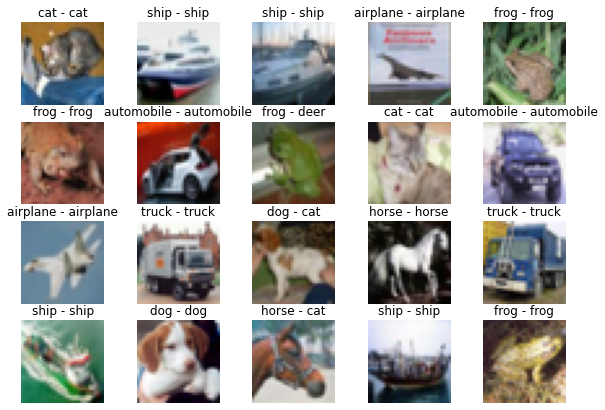

In [32]:
y_pred = model.predict(X_test[:20])
plt.figure(figsize=[10,7])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(labels[np.argmax(y_test[i])] + ' - ' + labels[np.argmax(y_pred[i])])